In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

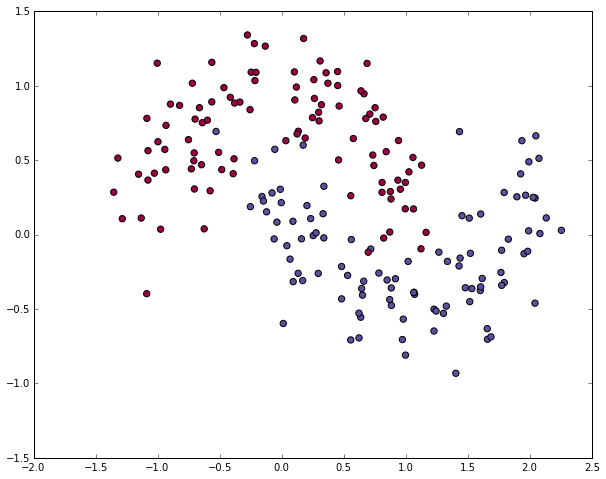

In [3]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [4]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(session, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = session.run(tf.argmax(model, 1), feed_dict={iX: np.c_[xx.ravel(), yy.ravel()]})
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

accuracy after iteration 0: 0.705000
accuracy after iteration 1000: 0.975000


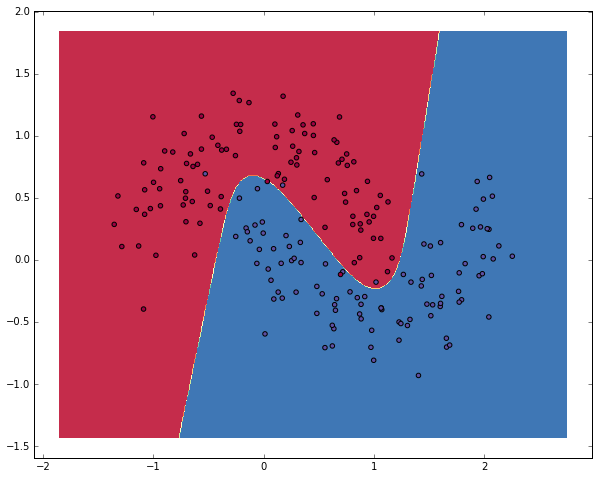

In [16]:
import tensorflow as tf


# arrange y in two classes
_y = (np.arange(2) == y[:, None]).astype(np.float32)


# network dimensions, weights, and biases
idim = 2   # features
hdim = 3   # hidden
odim = 2   # classes
weights = {
    'h': tf.Variable(tf.random_normal([idim, hdim])),
    'out': tf.Variable(tf.random_normal([hdim, odim]))
}
biases = {
    'h': tf.Variable(tf.zeros([1, hdim])),
    'out': tf.Variable(tf.zeros([1, odim]))
}

# network model
iX = tf.placeholder("float", [None, 2])
iy = tf.placeholder("float", [None, 2])
s1 = tf.add(tf.matmul(iX, weights['h']), biases['h'])
h = tf.nn.tanh(s1)
s2 = tf.add(tf.matmul(h, weights['out']), biases['out'])
model = tf.nn.softmax(s2)

# loss and optimizer
#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(model, iy))
cost = -tf.reduce_sum(iy*tf.log(model))
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# Evaluation.
correct_prediction = tf.equal(tf.argmax(model,1), tf.argmax(iy,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


# Initializing the variables
init = tf.initialize_all_variables()

# launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # training
    for i in xrange(2000):
        sess.run(optimizer, feed_dict={iX: X, iy: _y})
        if i % 1000 == 0:
            #print sess.run(weights['h'])
            #print sess.run(biases['h'])
            print "accuracy after iteration %i: %f" %(i, sess.run(accuracy, feed_dict={iX: X, iy: _y}))

    plot_decision_boundary(sess, model)
    